In [2]:
using ControlSystems
using Plots

$$
    G = \frac{k}{JL s^2 + (JR + bL)s + k^2}\\
    G = \frac{K}{s^2 + 2\zeta \omega_n s + \omega_n^2}\\
    G = \frac{\frac{k}{JL}}{s^2 + \frac{JR+bL}{JL} s + \frac{k^2}{JL}}\\
$$

If $b \approx 0$, then $2\zeta \omega_n = \frac{R}{L}$, $\omega_n^2 =  \frac{k^2}{JL}$.

$$
    \frac{\omega_n}{2\zeta} = \frac{k^2}{JR}\\
    J = \frac{2 \zeta k^2}{R \omega_n}\\
    L = \frac{k^2}{J\omega_n^2}
$$

In [3]:
s = tf("s")
ωₙ = 37.32  # rad/s
ζ = 0.81    # unitless

0.81

In [11]:
KV = 5000 # RPM / V
k = kₑ = kₜ = (1 / KV) * (60 / 2π)  # V / (rad/s) = Nm / A
R = 0.102                           # Ω, very approximate
# b = 0
# J = 2ζ * k^2 / (R * ωₙ)             # kg m²
# L = k^2 / (J * ωₙ^2)                # H

L = 9.85e-6
J = k^2 / L / ωₙ^2
b = (J * L * 2ζ * ωₙ - J * R) / L

z = R / L / 2 / ωₙ

V = 16.8
ΔV = 4.0

C = L * V^2 / (R^2 * (2V * ΔV + ΔV^2))

0.0017766693661194143

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Misha\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


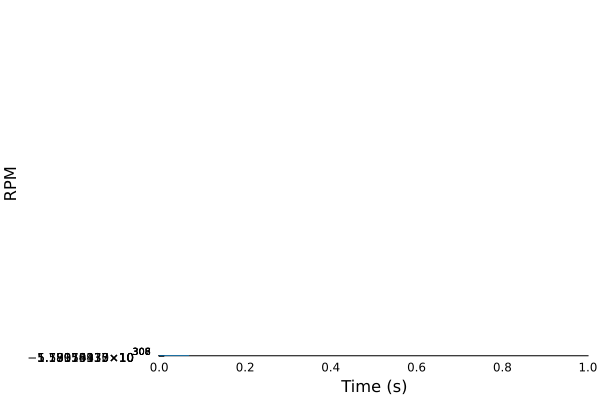

In [5]:
G = k / ((J*s + b) * (L*s + R) + k^2) # ω(s) / V(s)

plot(step(G*16.8 * (60/2π)), xlim=(0, 1), ylabel="RPM")

In [6]:
H = 1 / G # V(s) / ω(s)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
2.6189034346816565e-9s^2 + 1.5833471141535558e-7s - 0.2791892453217089
----------------------------------------------------------------------
                        0.0019098593171027443

Continuous-time transfer function model

In [7]:
ω_max = 16.8 * (k / (R + k^2))
t = 0.0:(1e-3):1.0
u = map(t -> clamp(11.0 * (0.1 - t) * 16.8 / k, 0.0, ω_max), t)

plot(t, u)
lsim(H, u, t, ω_max)

# plot(step(H * (16.8/k)))

ControlSystemsBase.ImproperException: System is improper, a state-space representation is impossible